

##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### WS2024/25

# Multivariate Verfahren
## Übung 4


### Aufgabe 5
Laden Sie den Datensatz *`umfrage_auto.csv`* aus Ilias herunter. Dieser enthält die Rohdaten der Umfrage. Führen Sie eine Korrespondenzanalyse durch und vergleichen Sie Ihr Ergebnis mit der Abbildung aus Aufgabe 4. 

Hinweis: Verwenden sie die symmetrische Normalisierung.


#### Datenvorbereitung

- Daten einlesen:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./umfrage_auto.csv",sep=',',header=None)
df.columns = ['Sicherheit','Sportlichkeit','Komfort','Ausstattung']
df.index= ['Mercedes','BMW', 'Opel','Audi','VW']
df

,Sicherheit,Sportlichkeit,Komfort,Ausstattung
Mercedes,9,3,6,5
BMW,3,6,3,1
Opel,1,1,2,8
Audi,2,5,4,4
VW,3,3,5,5


In [2]:
D = pd.DataFrame.to_numpy(df)
D

array([[9, 3, 6, 5],
       [3, 6, 3, 1],
       [1, 1, 2, 8],
       [2, 5, 4, 4],
       [3, 3, 5, 5]])

- Erstellen der Kontingenztabellen mit absoluten Häufigkeiten:

In [3]:
df.loc['Total'] = pd.Series(df.sum(axis=0))
df['Total'] = pd.Series(df.sum(axis=1))
df

,Sicherheit,Sportlichkeit,Komfort,Ausstattung,Total
Mercedes,9,3,6,5,23
BMW,3,6,3,1,13
Opel,1,1,2,8,12
Audi,2,5,4,4,15
VW,3,3,5,5,16
Total,18,18,20,23,79


- Erstellen der relativen Häufigkeitstabelle

In [4]:
np.sum(D) # die Fallzahl der Kontingenztabelle (Gesamthäufigkeit)

np.int64(79)

In [5]:
std_df=df/np.sum(D)
std_df

,Sicherheit,Sportlichkeit,Komfort,Ausstattung,Total
Mercedes,0.113924,0.037975,0.075949,0.063291,0.291139
BMW,0.037975,0.075949,0.037975,0.012658,0.164557
Opel,0.012658,0.012658,0.025316,0.101266,0.151899
Audi,0.025316,0.063291,0.050633,0.050633,0.189873
VW,0.037975,0.037975,0.063291,0.063291,0.202532
Total,0.227848,0.227848,0.253165,0.291139,1.000000


*In einer Kontingenztabelle werden die gemeinsamen Häufigkeiten der Merkmalsausprägungen von zwei kategorialen Variablen zusammengestellt.*

*Die gemeinsamen Häufigkeiten in den Zellen einer Kontingenztabelle sind ein Ausdruck des Zusammenhangs(Korrespondenz) der betreffenden Kombination von Marke und Merkmal.*


#### Korrespondenzanalyse

- Standardisierung der Daten

*Die Randverteilungen (marginalen Häufigkeiten) der relativen Kontigenztabelle $p_{i\cdot}=\{\frac{n_{i\cdot}}{n}\} , i=1, \dots, I $ ; $p_{\cdot j}=\{\frac{n_{\cdot j}}{n}\} , j=1, \dots, J$ :*

In [6]:
# relative feature frequency
pi=np.array(std_df.iloc[:5, 4])
pj=np.array(std_df.iloc[5, :4])


*Die erwarteten relativen Häufigkeiten $\widehat{e}_{ij}=p_{i\cdot}\cdot p_{\cdot j}$ :*

In [7]:
# relative expected frequency
e_rel=np.tensordot(pi,pj,axes=0)
e_rel

array([[0.06633552, 0.06633552, 0.07370614, 0.08476206],
       [0.03749399, 0.03749399, 0.04165999, 0.04790899],
       [0.03460984, 0.03460984, 0.03845538, 0.04422368],
       [0.0432623 , 0.0432623 , 0.04806922, 0.0552796 ],
       [0.04614645, 0.04614645, 0.05127383, 0.05896491]])

*Die erwarteten Häufigkeiten geben an, welche Werte theoretisch bei Unabhängigkeit zwischen Zeilen- und Spaltenmerkmalen zu erwarten wären.*


*In der Korrespondenzanalyse werden die relativen Häufigkeiten unter Verwendung der erwarteten relativen Häufigkeiten wie folgt standardisiert :*

$z_{ij}=\frac{p_{ij}-\widehat{e}_{ij}}{\sqrt{\widehat{e}_{ij}}}$

In [8]:
# relative frequency table
z=(std_df.iloc[:5,:4]-e_rel)/np.sqrt(e_rel)
z

,Sicherheit,Sportlichkeit,Komfort,Ausstattung
Mercedes,0.184769,-0.110115,0.008263,-0.073748
BMW,0.002482,0.198599,-0.018056,-0.161050
Opel,-0.117996,-0.117996,-0.067001,0.271249
Audi,-0.086280,0.096294,0.011693,-0.019763
VW,-0.038041,-0.038041,0.053071,0.017816


- Extraktion der Dimensionen mit Singulärwertzerlegung

*Die standardisiert ($I\times J$) -Häufigkeitsmatrix $\mathbf{Z}$ mit Rang $K$ kann gemäß der Singulärwertzerlegung*

$\mathbf{Z}=\mathbf{U}\mathbf{D_{\alpha}}\mathbf{V}$

*dargestellt werden, wobei die Matrix $\mathbf{D_{\alpha}}$ eine Diagonalmatrix mit den Singulärwerten $\alpha_1\geq \alpha_2\geq \dots \geq \alpha_K >0$ ist. Die Matrizen $\mathbf{U}$ und $\mathbf{V}$ bestehen aus orthonormalen Vektoren $u_k , k=1 \dots K$ und $v_k , k=1 \dots K$*

In [9]:
# Singular Value Decomposition
u, d, v = np.linalg.svd(z, full_matrices=False)
u # u,v Unitary arrays

array([[-0.14260291,  0.7882021 , -0.18127624,  0.30651023],
       [-0.57255134, -0.38333365, -0.43383314,  0.57604414],
       [ 0.79472063, -0.19116712, -0.4095449 ,  0.3738126 ],
       [-0.10286896, -0.44182602,  0.21978706, -0.12371199],
       [ 0.09841988, -0.00613706,  0.75026286,  0.64744429]])

In [10]:
v

array([[-0.29004091, -0.51182558, -0.09982733,  0.80246205],
       [ 0.7378481 , -0.6556009 ,  0.07446989, -0.14220366],
       [-0.37895692, -0.28350297,  0.85517494, -0.21140845],
       [ 0.47733437,  0.47733437,  0.50315461,  0.5395732 ]])

In [11]:
d # Vector with the singular values

array([4.01364388e-01, 2.78641026e-01, 8.90608610e-02, 1.16702711e-17])

*Anteil der Total Inertia (Trägheit): $\frac{\alpha_k^2}{T}$, mit $T=\sum_{k=1}^{K}\alpha_k^2= {Spur}(\mathbf{D^2_{\alpha}})$.*

In [12]:
# share of total inertia
np.diag(d)*np.diag(d)/np.trace(np.diag(d)*np.diag(d))

array([[6.53082922e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.14760899e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.21561787e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.52144236e-34]])

- Symmetrische Normalisierung der Koordinaten 

*Die Koordinaten für die Zeilenelemente (Marken): $r_{ik}=u_{ik}\frac{\sqrt{\alpha_k}}{\sqrt{p_{i\cdot}}}$.*

*Die Koordinaten für die Spaltenelemente (Merkmale): $c_{jk}=v_{jk}\frac{\sqrt{\alpha_k}}{\sqrt{p_{\cdot j}}}$*


Zeilenprofile:

In [13]:
row_profiles=np.multiply(u*np.sqrt(d),(np.ones((4,1))*(1/np.sqrt(pi))).transpose())
row_profiles

array([[-1.67435462e-01,  7.71098302e-01, -1.00261442e-01,
         1.94059574e-09],
       [-8.94181590e-01, -4.98817110e-01, -3.19159692e-01,
         4.85107633e-09],
       [ 1.29183434e+00, -2.58915855e-01, -3.13594104e-01,
         3.27655404e-09],
       [-1.49562141e-01, -5.35231587e-01,  1.50526681e-01,
        -9.69884839e-10],
       [ 1.38549768e-01, -7.19840286e-03,  4.97519888e-01,
         4.91469339e-09]])

Spaltenprofile:

In [14]:
column_profiles=np.multiply(v.T*np.sqrt(d),(np.ones((4,1))*(1/np.sqrt(pj))).transpose())
column_profiles

array([[-3.84951465e-01,  8.15956087e-01, -2.36924833e-01,
         3.41617785e-09],
       [-6.79311082e-01, -7.25002264e-01, -1.77246781e-01,
         3.41617785e-09],
       [-1.25694831e-01,  7.81271181e-02,  5.07220689e-01,
         3.41617785e-09],
       [ 9.42200977e-01, -1.39117877e-01, -1.16927162e-01,
         3.41617785e-09]])

#### Visualisierung der Ergebnisse in zwei Dimensionen

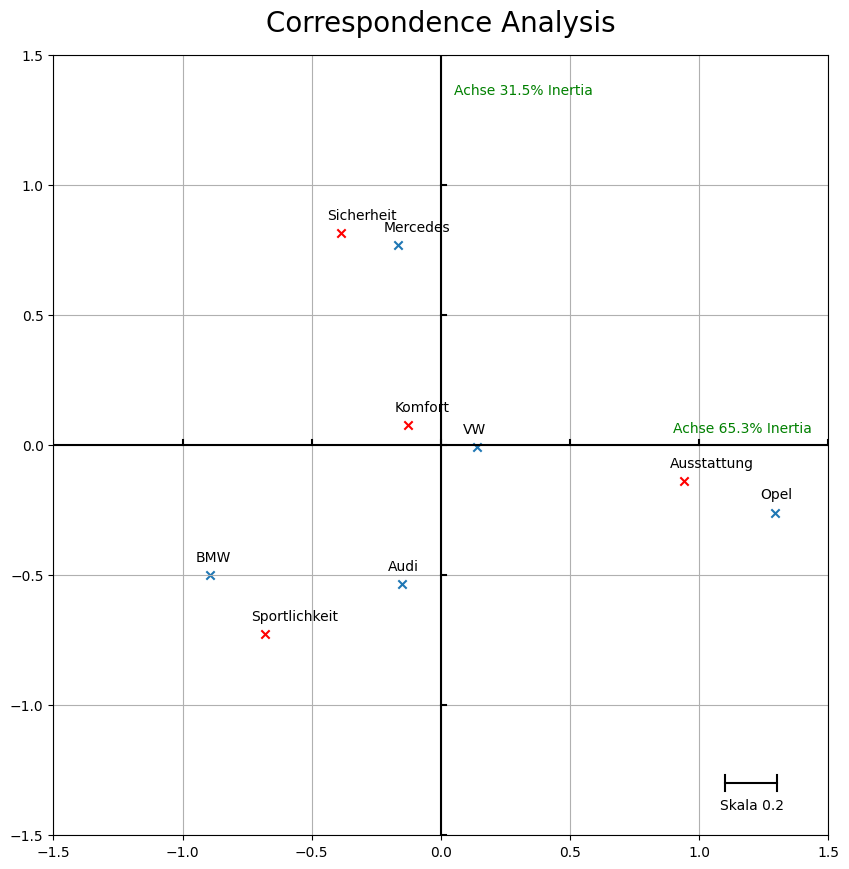

In [15]:
# plot correspondence analysis outcome
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
plt.xlim((-1.5, 1.5)) 
plt.ylim((-1.5, 1.5)) 
rowlabel=['Mercedes','BMW', 'Opel','Audi','VW']
columnlabel=['Sicherheit','Sportlichkeit','Komfort','Ausstattung']
plt.subplots_adjust(bottom = 0.1)
ax.scatter(row_profiles[:, 0], row_profiles[:, 1],marker='x')
ax.scatter(column_profiles[:, 0], column_profiles[:, 1],marker='x', c='red')
for label, x, y in zip(rowlabel, row_profiles[:, 0], row_profiles[:, 1]):
    ax.annotate(
        label,
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points'
    )
for label, x, y in zip(columnlabel, column_profiles[:, 0], column_profiles[:, 1]):
    ax.annotate(
        label,
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points'
    )
hline=plt.axhline(0, linestyle='-', color='k')
ax.text(0.9,0.05,'Achse 65.3% Inertia',color='g')
plt.axvline(0, linestyle='-', color='k')
ax.text(0.05,1.35,'Achse 31.5% Inertia',color='g')
ax.text(1.08,-1.4,'Skala 0.2',color='k')
ax.plot([1.1,1.3],[-1.3 ,-1.3],'k')
ax.plot([1.1, 1.1],[-1.33,-1.27],'-k')
ax.plot([1.3, 1.3],[-1.33,-1.27],'-k')
X=ax.get_xticks()
for i in X:
    ax.plot([i, i],[0, 0.02],'-k')
Y=ax.get_yticks()
for j in Y:
    ax.plot([0, 0.02],[j, j],'-k')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True, which='both')
plt.title('Correspondence Analysis', y=1.02, fontsize=20)
plt.show()